In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
torch.rand(3,3)

tensor([[0.0651, 0.5926, 0.3609],
        [0.2691, 0.0688, 0.8725],
        [0.7610, 0.2761, 0.4159]])

In [5]:
torch.cuda.is_available()

True

In [6]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias  #aka y = wx + b. linear regression formula

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.8, random_state=42)


In [8]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

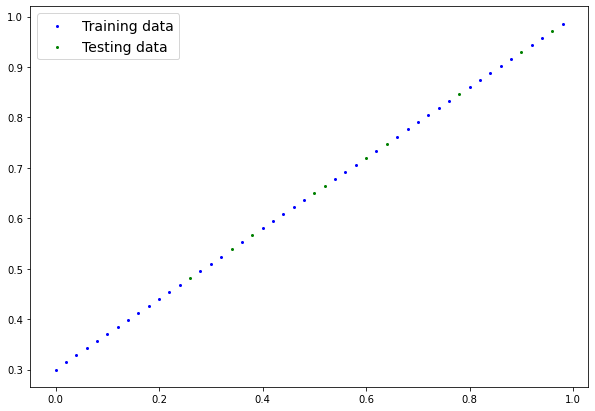

In [9]:
plot_predictions();

In [10]:

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, 
                                                requires_grad=True, 
                                                dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1, 
                                                requires_grad=True, 
                                                dtype = torch.float))
        def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.weight * x + self.bias  #linear regression formula
        

In [16]:
# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

#list(model_0.parameters())

# List named parameters 
model_0.state_dict()

OrderedDict([('weight', tensor([-0.9790])), ('bias', tensor([0.0212]))])

In [14]:
#Step up loss function, for error of distance. to minimazie the distance 
loss_fn = nn.L1Loss()

#SetUp optimizer (stochastic gradient descent) - adjust the parameters to reducde the loss
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr =0.01) #lr = learning rate - steps to change in parameters